## Get the Dataset and from Kaggle

In [ ]:
# Download the dataset to the "data/" folder and unzip it
!kaggle datasets download -d puneet6060/intel-image-classification -p ./data/ --unzip

## Import all necessary libraries

In [29]:
import tensorflow as tf  # or import torch for PyTorch
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tqdm import tqdm




## Load the Dataset 

In [32]:
# Define dataset paths
train_dataset_path = '/content/data/seg_train/seg_train'
test_dataset_path = '/content/data/seg_test/seg_test'

# Function to load image data
def load_data(dataset_paths, image_size=(150, 150)):
    class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
    class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
    nb_classes = len(class_names)

    data = []
    for dataset_path in dataset_paths:
        images = []
        labels = []

        print("Loading {}".format(dataset_path))
        for folder in os.listdir(dataset_path):
            if folder.startswith('.'):  # Skip hidden files/folders
                continue
            label = class_names_label[folder]
            for file in tqdm(os.listdir(os.path.join(dataset_path, folder))):
                if file.startswith('.'):  # Skip hidden files
                    continue
                img_path = os.path.join(os.path.join(dataset_path, folder), file)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size)
                images.append(image / 255)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        labels = tf.keras.utils.to_categorical(labels, nb_classes)  # Convert labels to one-hot vectors

        data.append((images, labels))

    return data


In [33]:
train_data, test_data = load_data([train_dataset_path, test_dataset_path])


Loading seg_train/seg_train


100%|██████████| 2274/2274 [00:03<00:00, 687.26it/s]


Loading seg_test/seg_test


100%|██████████| 510/510 [00:00<00:00, 1607.95it/s]


## Model Building 
### Import Libraries

In [34]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

## Creating and compliing the model

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

input_shape = (150, 150, 3)
model = keras.Sequential(
    [
        
        layers.Conv2D(32, 3, input_shape = input_shape, activation='relu', padding="same", strides=1),
        layers.Conv2D(32, 3, activation='relu', padding="same", strides=1),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        layers.Conv2D(64, 3, activation='relu', padding="same", strides=1),
        layers.Conv2D(64, 3, activation='relu', padding="same", strides=1),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        layers.Conv2D(128, 3, activation='relu', padding="same", strides=1),
        layers.Conv2D(128, 3, activation='relu', padding="same", strides=1),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        layers.Conv2D(64, 3, activation='relu', padding="same", strides=1),
        layers.Conv2D(64, 3, activation='relu', padding="same", strides=1),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        layers.Reshape([-1]),
        layers.Dense(16, activation="relu"),
        layers.Dense(6, activation="softmax"),
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'],  # Note the square brackets
                       )

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 18, 18, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │        82,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480,790 (1.83 MB)

 Trainable params: 480,790 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

## # Load and preprocess the data and Train the model

In [37]:
# Load and preprocess your data (assuming you already have loaded the data)
train_data, test_data = load_data([train_dataset_path, test_dataset_path])

# Separate images and labels from the data
train_images, train_labels = train_data
test_images, test_labels = test_data

# Check the shape of the data to ensure it's loaded correctly
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Train the model
hist = model.fit(x=train_images, y=train_labels, epochs=1, batch_size=2, validation_data=(test_images, test_labels))


Loading seg_train/seg_train


100%|██████████| 2274/2274 [00:03<00:00, 652.21it/s]


Loading seg_test/seg_test


100%|██████████| 510/510 [00:00<00:00, 1782.97it/s]


Train images shape: (14034, 150, 150, 3)
Train labels shape: (14034, 6)
Test images shape: (3000, 150, 150, 3)
Test labels shape: (3000, 6)
7017/7017 ━━━━━━━━━━━━━━━━━━━━ 846s 120ms/step - accuracy: 0.1759 - loss: 1.7923 - val_accuracy: 0.1750 - val_loss: 1.7899


## Evaluate the Model:

In [38]:
test_loss, test_accuracy = model.evaluate(test_data[0], test_data[1])
print("Test Accuracy:", test_accuracy)


94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 473ms/step - accuracy: 0.0551 - loss: 1.8107
Test Accuracy: 0.17499999701976776


## validate the model

In [39]:
validation_data = (test_images, test_labels)
hist = model.fit(x=train_images, y=train_labels, epochs=10, batch_size=16, validation_data=validation_data)

Epoch 1/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 762s 866ms/step - accuracy: 0.1793 - loss: 1.7912 - val_accuracy: 0.1750 - val_loss: 1.7900
Epoch 2/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 755s 860ms/step - accuracy: 0.1777 - loss: 1.7908 - val_accuracy: 0.1750 - val_loss: 1.7902
Epoch 3/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 758s 863ms/step - accuracy: 0.1762 - loss: 1.7911 - val_accuracy: 0.1750 - val_loss: 1.7901
Epoch 4/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 750s 854ms/step - accuracy: 0.1806 - loss: 1.7903 - val_accuracy: 0.1750 - val_loss: 1.7900
Epoch 5/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 766s 873ms/step - accuracy: 0.1813 - loss: 1.7909 - val_accuracy: 0.1750 - val_loss: 1.7901
Epoch 6/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 748s 852ms/step - accuracy: 0.1727 - loss: 1.7915 - val_accuracy: 0.1750 - val_loss: 1.7904
Epoch 7/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 747s 851ms/step - accuracy: 0.1821 - loss: 1.7908 - val_accuracy: 0.1750 - val_loss: 1.7901
Epoch 8/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 744s 847ms/step - accuracy: 0.1803 -

## Visualize Training History

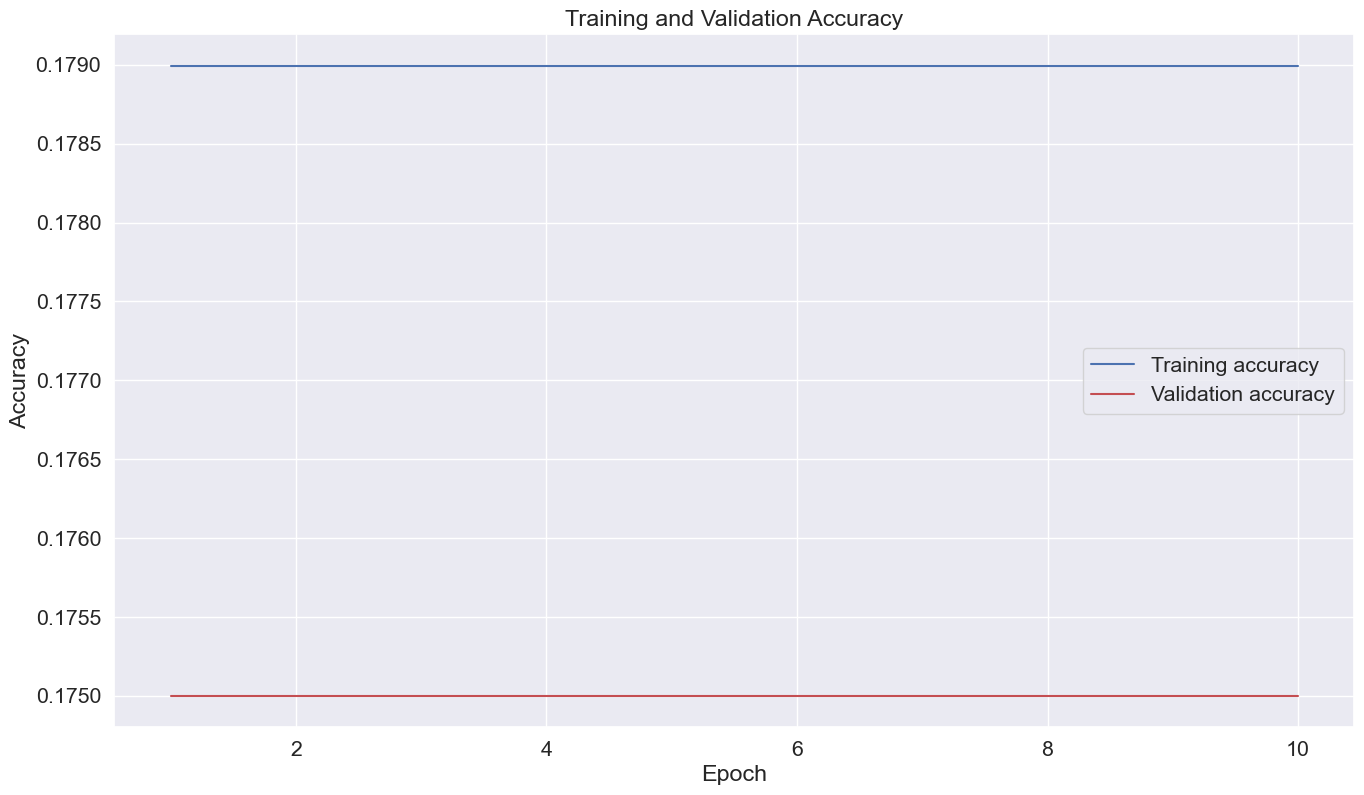

In [43]:
plt.figure(figsize=(16, 9))
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, c='b', label="Training accuracy")
plt.plot(epochs, val_accuracy, c='r', label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

## Accuracy of the data

In [44]:
# Get the final training and validation accuracy
train_accuracy = hist.history['accuracy'][-1]
val_accuracy = hist.history['val_accuracy'][-1]

print("Final Training Accuracy:", train_accuracy)
print("Final Validation Accuracy:", val_accuracy)

Final Training Accuracy: 0.17899386584758759
Final Validation Accuracy: 0.17499999701976776


## Plot the loss data graph

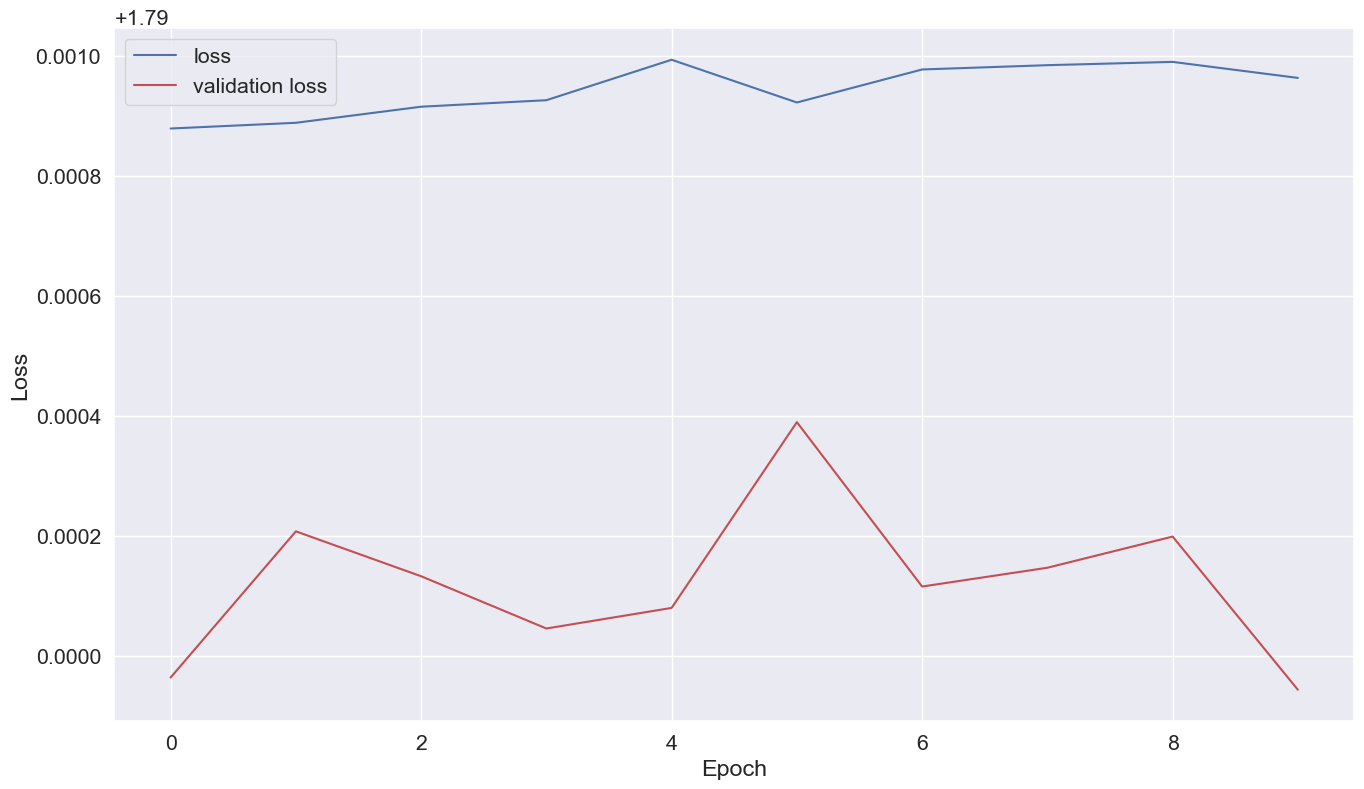

In [45]:
plt.figure(figsize=(16,9))
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(loss, c='b', label="loss")
plt.plot(val_loss, c='r', label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Data exploration of the images

Class Distribution:
mountain: 2512.0
street: 2382.0
glacier: 2404.0
buildings: 2191.0
sea: 2274.0
forest: 2271.0


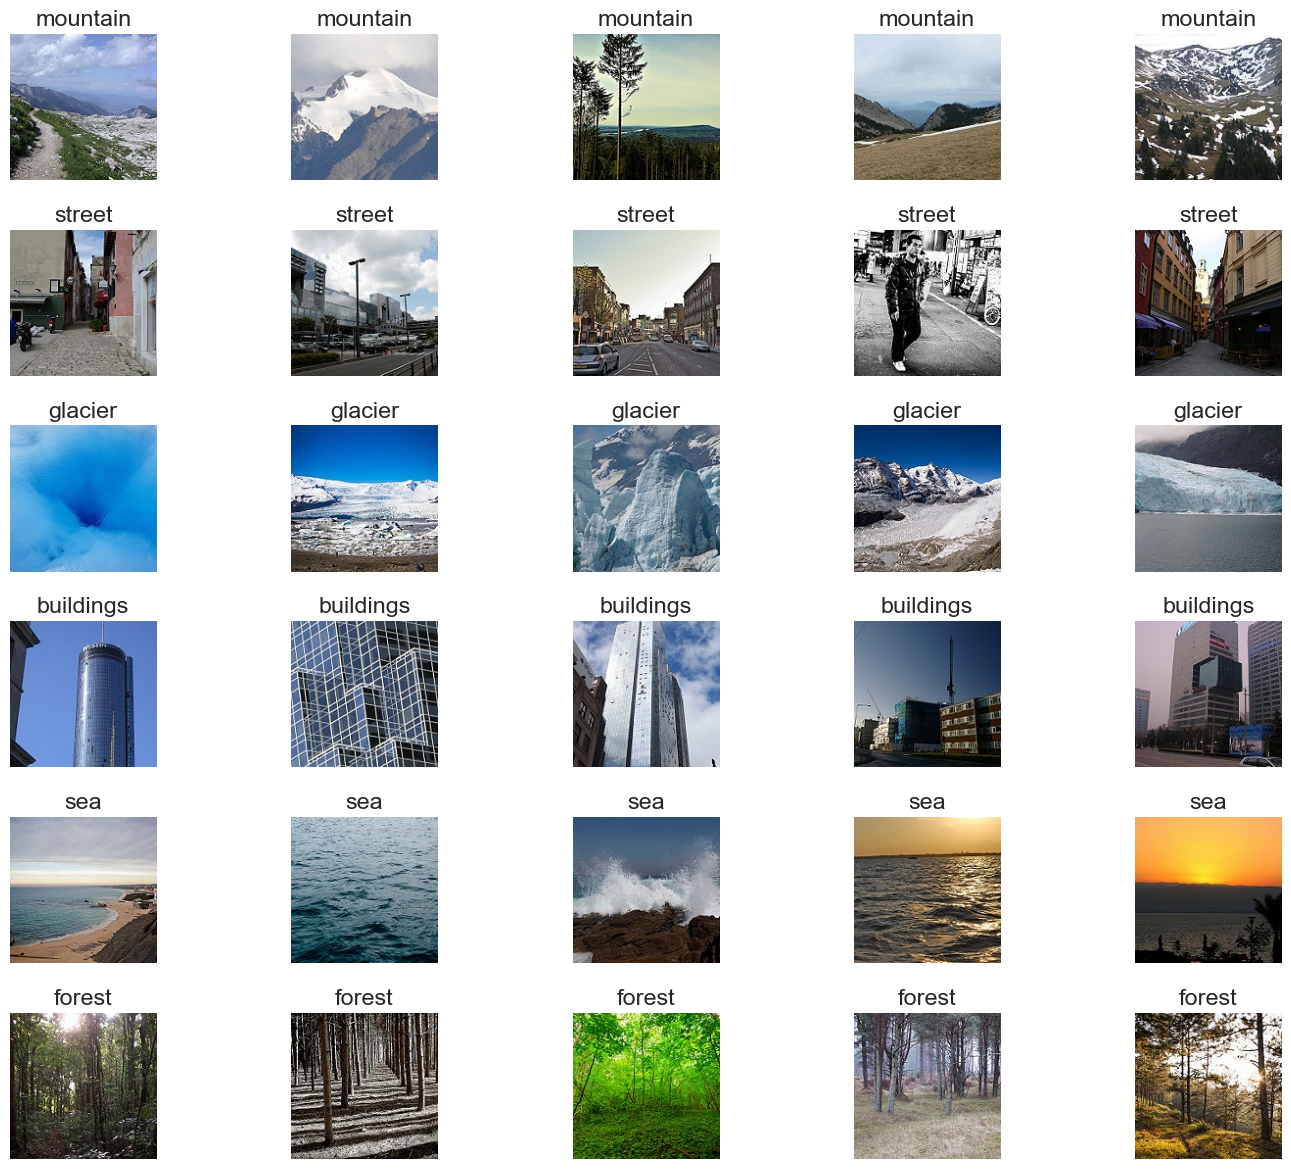

In [48]:
import matplotlib.pyplot as plt

# Define class names (if not already defined)
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

# Class Distribution
class_counts = {class_name: sum(train_labels[:, i]) for i, class_name in enumerate(class_names)}
print("Class Distribution:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Visualize Sample Images
fig, axes = plt.subplots(nrows=len(class_names), ncols=5, figsize=(15, 2*len(class_names)))
for i, class_name in enumerate(class_names):
    class_indices = np.where(train_labels[:, i] == 1)[0]
    sample_indices = np.random.choice(class_indices, size=5, replace=False)
    for j, idx in enumerate(sample_indices):
        axes[i, j].imshow(train_images[idx])
        axes[i, j].set_title(class_name)
        axes[i, j].axis("off")
plt.tight_layout()
plt.show()


## Visualize More Sample Images for Specific Classes

Sample Images for Class: mountain


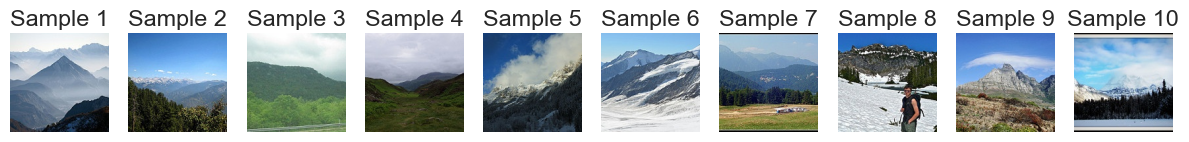

Sample Images for Class: street


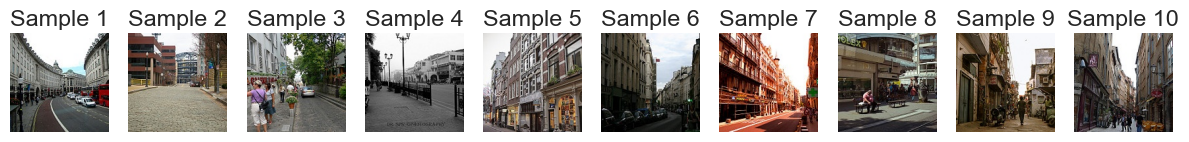

In [50]:
# Visualize More Sample Images for Specific Classes
classes_to_visualize = ['mountain', 'street']  # You can specify the classes you want to visualize
num_samples_per_class = 10  # Number of samples to visualize per class

for class_name in classes_to_visualize:
    class_idx = class_names.index(class_name)
    class_indices = np.where(train_labels[:, class_idx] == 1)[0]
    sample_indices = np.random.choice(class_indices, size=num_samples_per_class, replace=False)

    print(f"Sample Images for Class: {class_name}")
    plt.figure(figsize=(15, 2))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_samples_per_class, i + 1)
        plt.imshow(train_images[idx])
        plt.title(f"Sample {i+1}")
        plt.axis("off")
    plt.show()


## confusion matrix

94/94 ━━━━━━━━━━━━━━━━━━━━ 48s 503ms/step


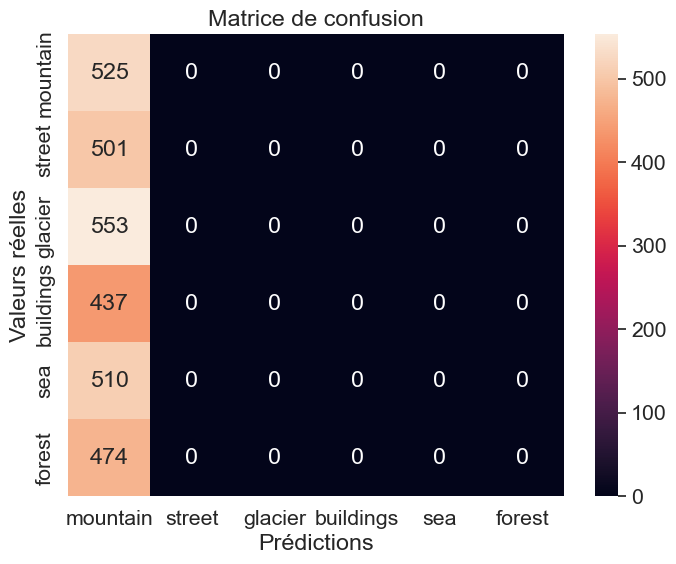

In [49]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_pred)

classes = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion")
plt.show()